In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy import stats


# Import API key
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
#https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [4]:
# List for holding cities
cities = []
                   
  # Create a set of random latitude and longitude combinations.
#lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
#              

# Identify nearest city for each lat, lng combination
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [12]:
#set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


#saving the config information
url = 'https://api.openweathermap.org/data/2.5/weather?'
#city = cities
city_data =[] 
for city in cities:
    query_url = (f'{url}appid={weather_api_key}&q={city}&units=imperial')
    weather_response = requests.get(query_url)
    city_weather = weather_response.json()
    #print(json.dumps(weather_json, indent=4, sort_keys=True))
     
    
    try:

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          })

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [16]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)


# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,cape town,-33.9258,18.4232,60.67,70,0,11.01
1,chumikan,54.7183,135.3150,21.97,92,8,5.75
2,termiz,37.2242,67.2783,73.49,33,0,4.61
3,barra dos coqueiros,-10.9089,-37.0386,86.02,66,75,13.80
4,champerico,14.3000,-91.9167,90.14,64,61,8.81


## Latitude vs. Temperature Plot

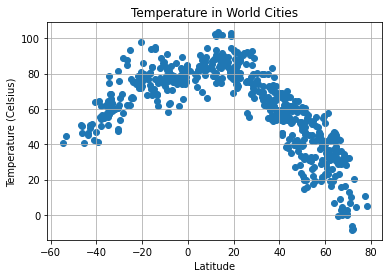

In [19]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot

## Latitude vs. Humidity Plot

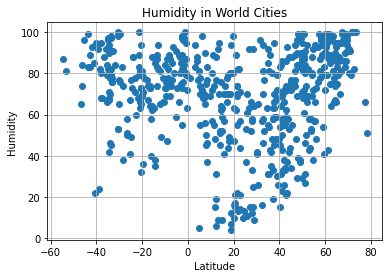

In [22]:
plt.scatter(city_data_pd["Lat"], city_data_pd['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

## Latitude vs. Cloudiness Plot

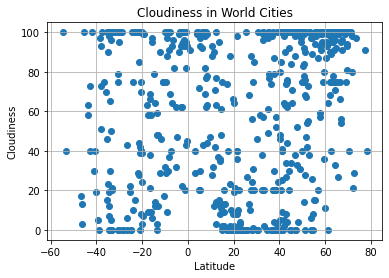

In [23]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

## Latitude vs. Wind Speed Plot

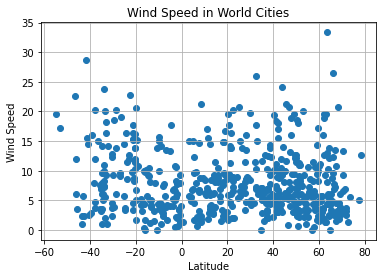

In [24]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

## Linear Regression

In [33]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Max Temp'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'] * slope + intercept
print(regress_values)


1      40.550854
2      60.276651
4      86.125259
5      28.639557
6      21.864448
         ...    
551    83.234850
553    34.933645
554    45.082213
555    65.391415
556    73.270977
Name: Lat, Length: 386, dtype: float64


In [32]:
# city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat']

1      54.7183
2      37.2242
4      14.3000
5      65.2820
6      71.2906
        ...   
551    16.8634
553    59.7000
554    50.6996
555    32.6881
556    25.7000
Name: Lat, Length: 386, dtype: float64

In [34]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.13x +102.25


The r-value is: 0.7844103529819774


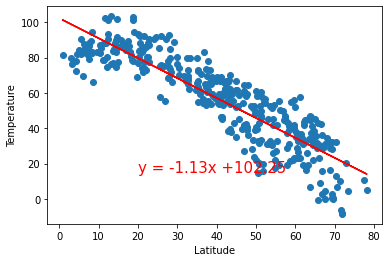

In [38]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Max Temp'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [39]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Max Temp'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'] * slope + intercept
print(regress_values)


0      61.889052
3      77.246237
7      69.098627
9      67.933406
11     71.041886
         ...    
541    71.480779
547    65.475858
548    82.756686
550    67.983847
552    57.293486
Name: Lat, Length: 171, dtype: float64


In [40]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.67x +84.52


The r-value is: 0.5190543829093959


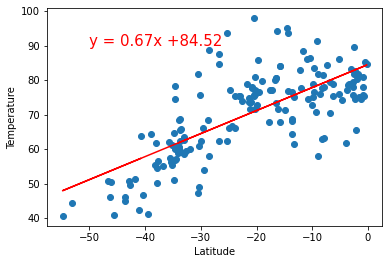

In [44]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Max Temp'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()